In [1]:
import os

os.environ["JAX_ENABLE_X64"] = "True"

import matplotlib.pyplot as plt
import seaborn as sns

import optax
import jax
import jax.numpy as jnp
from jax import random as jax_random

plt.style.use("seaborn-v0_8-notebook")
plt.style.use("petroff10")

In [2]:
key_random = jax.random.key(12)

In [3]:
print(f"Jax version {jax.__version__}")

Jax version 0.5.0


In [4]:
jax_scalar = jnp.array(3.14)
jax_vector = jnp.array([1, 2, 3, 4])
jax_matrix = jnp.array([[1, 2], [3, 4], [5, 6], [7, 8]])
jax_tensor3d = jnp.array(
    [
        [[1, 2, 3], [4, 5, 6]],
        [[7, 8, 9], [10, 11, 12]],
        [[13, 14, 15], [16, 17, 18]],
        [
            [19, 20, 21],
            [22, 23, 24],
        ],
    ]
)

In [5]:
print(jax_scalar.shape)
print(jax_vector.shape)
print(jax_matrix.shape)
print(jax_tensor3d.shape)

()
(4,)
(4, 2)
(4, 2, 3)


In [6]:
x_jax_32 = jax_random.normal(key_random, shape=(4, 4), dtype=jnp.float32)
print(x_jax_32.dtype)
print(x_jax_32)

float32
[[ 0.25540063  0.08309579  0.11247405 -0.7555607 ]
 [ 0.14588562 -2.022738    1.9076333   0.70139664]
 [-0.1720313  -1.2885561   1.7282716   0.18993305]
 [ 1.3156701   1.0032809  -1.5069588  -1.0568671 ]]


In [7]:
x_jax_64 = jnp.asarray(x_jax_32, dtype=jnp.float64)
print(x_jax_32.dtype, x_jax_64.dtype)

float32 float64


In [8]:
b_np = x_jax_64 > 0.5
print(b_np)
print(b_np.dtype)

[[False False False False]
 [False False  True  True]
 [False False  True False]
 [ True  True False False]]
bool


In [9]:
jnp.sum(x_jax_32)

Array(0.6403296, dtype=float32)

In [10]:
jnp.transpose(x_jax_32)

Array([[ 0.25540063,  0.14588562, -0.1720313 ,  1.3156701 ],
       [ 0.08309579, -2.022738  , -1.2885561 ,  1.0032809 ],
       [ 0.11247405,  1.9076333 ,  1.7282716 , -1.5069588 ],
       [-0.7555607 ,  0.70139664,  0.18993305, -1.0568671 ]],      dtype=float32)

In [11]:
x_jax_32.T

Array([[ 0.25540063,  0.14588562, -0.1720313 ,  1.3156701 ],
       [ 0.08309579, -2.022738  , -1.2885561 ,  1.0032809 ],
       [ 0.11247405,  1.9076333 ,  1.7282716 , -1.5069588 ],
       [-0.7555607 ,  0.70139664,  0.18993305, -1.0568671 ]],      dtype=float32)

In [12]:
print(jnp.transpose(jax_tensor3d, axes=[2, 1, 0]).shape)

(3, 2, 4)


In [13]:
# TODO: change device

<Axes: >

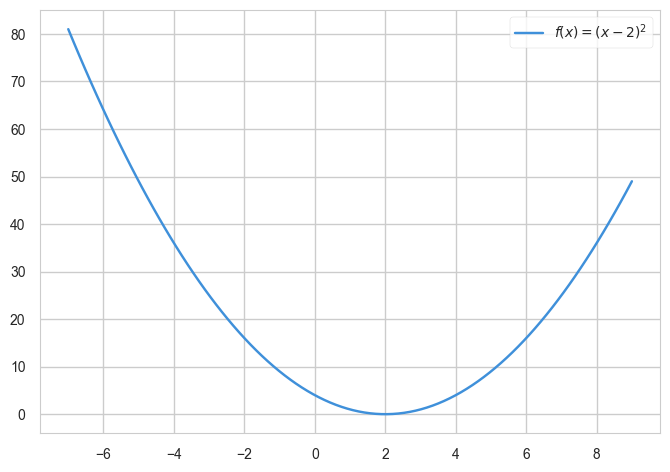

In [14]:
def f(x):
    return jnp.pow((x - 2.0), 2)


x_axis_vals = jnp.linspace(-7, 9, 100)
y_axis_vals = f(jnp.array(x_axis_vals))

sns.lineplot(x=x_axis_vals, y=y_axis_vals, label="$f(x)=(x-2)^2$")

<Axes: >

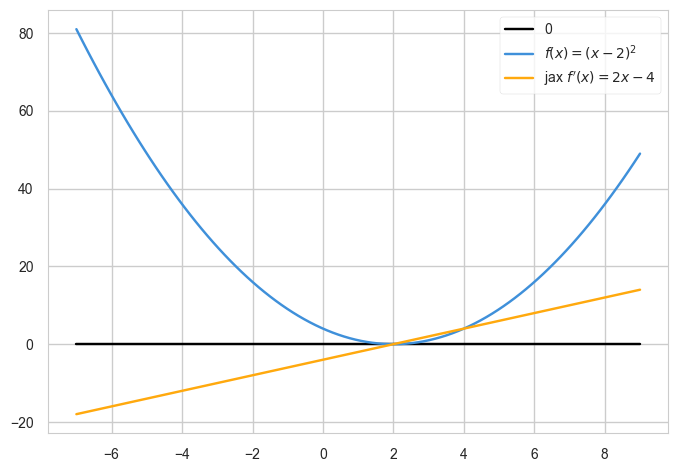

In [15]:
def fP(x):  # Defining the derivative of f(x) manually
    return 2 * x - 4


jax_grad_fP = jax.vmap(jax.grad(f))

y_axis_vals_p = fP(jnp.array(x_axis_vals))
y_axis_vals_p_jax = jax_grad_fP(jnp.array(x_axis_vals))

# First, lets draw a black line at 0, so that we can easily tell if something is positive or negative
sns.lineplot(x=x_axis_vals, y=[0.0] * len(x_axis_vals), label="0", color="black")
sns.lineplot(x=x_axis_vals, y=y_axis_vals, label="$f(x) = (x-2)^2$")

# sns.lineplot(x=x_axis_vals, y=y_axis_vals_p, label="$f'(x)=2 x - 4$")
sns.lineplot(x=x_axis_vals, y=y_axis_vals_p_jax, label="jax $f'(x)=2 x - 4$")

In [16]:
x = jnp.array([-3.5])

x_cur = x.clone()
x_prev = x_cur * 100  # Make the initial "previous" solution larger
epsilon = 1e-8
eta = 0.1

grad_f = jax.vmap(jax.grad(f))
while jnp.linalg.norm(x_cur - x_prev) > epsilon:
    x_prev = x_cur.clone()
    x_cur = x_cur - eta * grad_f(x_cur)

print(x_cur)

[1.99999996]


In [17]:
optimizer = optax.sgd(eta)

# Initialize parameters of the model + optimizer.
x_param = jnp.array(-3.5)
opt_state = optimizer.init(x_param)
grad_f = jax.grad(f)

for epoch in range(60):
    g = grad_f(x_param)
    updates, opt_state = optimizer.update(g, opt_state)
    x_param = optax.apply_updates(x_param, updates)
print(x_param)

1.9999915712745253
